# Prepare Notebook

In [2]:
%load_ext autoreload
%autoreload 1
%aimport co2_problem_lib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [11]:
from co2_data import (co2_by_month_training_data, co2_dates_training_data, NUMBER_FORECAST_STEPS, 
                      co2_by_month_test_data, co2_dates_test_data)
from co2_problem_lib import plot_forecast

import tensorflow as tf
from tensorflow import keras

In [5]:
import os 
os.environ["CUDA_VISIBLE_DEVICE"]="1"
import tensorflow as tf

In [40]:
from tensorflow import keras

In [16]:
from co2_data import co2_by_month,co2_dates

In [7]:
import numpy as np
import pandas as pd


In [17]:
co2_dates

array(['1966-01', '1966-02', '1966-03', '1966-04', '1966-05', '1966-06',
       '1966-07', '1966-08', '1966-09', '1966-10', '1966-11', '1966-12',
       '1967-01', '1967-02', '1967-03', '1967-04', '1967-05', '1967-06',
       '1967-07', '1967-08', '1967-09', '1967-10', '1967-11', '1967-12',
       '1968-01', '1968-02', '1968-03', '1968-04', '1968-05', '1968-06',
       '1968-07', '1968-08', '1968-09', '1968-10', '1968-11', '1968-12',
       '1969-01', '1969-02', '1969-03', '1969-04', '1969-05', '1969-06',
       '1969-07', '1969-08', '1969-09', '1969-10', '1969-11', '1969-12',
       '1970-01', '1970-02', '1970-03', '1970-04', '1970-05', '1970-06',
       '1970-07', '1970-08', '1970-09', '1970-10', '1970-11', '1970-12',
       '1971-01', '1971-02', '1971-03', '1971-04', '1971-05', '1971-06',
       '1971-07', '1971-08', '1971-09', '1971-10', '1971-11', '1971-12',
       '1972-01', '1972-02', '1972-03', '1972-04', '1972-05', '1972-06',
       '1972-07', '1972-08', '1972-09', '1972-10', 

In [95]:
y_train=co2_by_month_training_data
x_train=co2_dates_training_data

In [96]:
x_test=co2_dates_test_data
y_test=co2_by_month_test_data

In [99]:
input_test_date=pd.Series(x_test)
input_date=pd.Series(x_train)

In [100]:
x_test=pd.DataFrame()
x_test['month']=input_test_date.map(lambda x: x.month)
x_test['year']=input_test_date.map(lambda x: x.year)

In [101]:
x_train=pd.DataFrame()
x_train['month']=input_date.map(lambda x: x.month)
x_train['year']=input_date.map(lambda x: x.year)

In [102]:
yearmin=x_train['year'].min()
yearmax=x_train['year'].max()
x_train['month']=x_train['month']/12
x_train['year']=(x_train['year']-yearmin)/(yearmax-yearmin)
x_test['month']=x_test['month']/12
x_test['year']=(x_test['year']-yearmin)/(yearmax-yearmin)

In [103]:
x_train

,month,year
0,0.083333,0.000000
1,0.166667,0.000000
2,0.250000,0.000000
3,0.333333,0.000000
4,0.416667,0.000000
...,...,...
512,0.750000,0.976744
513,0.833333,0.976744
514,0.916667,0.976744
515,1.000000,0.976744


In [104]:
x_test

,month,year
0,0.166667,1.000000
1,0.250000,1.000000
2,0.333333,1.000000
3,0.416667,1.000000
4,0.500000,1.000000
...,...,...
115,0.750000,1.209302
116,0.833333,1.209302
117,0.916667,1.209302
118,1.000000,1.209302


In [40]:
model= keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,))])


model.compile(optimizer=keras.optimizers.Adam(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError()
              )

model.fit(x_train,y_train , epochs=200,batch_size=517)

Epoch 1/200
1/1 [==============================] - 0s 325ms/step - loss: 122836.2109
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 121409.2109
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 119991.0469
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 118581.8047
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 117181.6797
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 115790.7812
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 114409.2500
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 113037.2344
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 111674.8594
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 110322.2344
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - loss: 108979.4922
Epoch 12/200
1/1 [==============================] - 0s 13ms/step - loss: 1076

1/1 [==============================] - 0s 15ms/step - loss: 6987.3062
Epoch 197/200
1/1 [==============================] - 0s 7ms/step - loss: 6897.3584
Epoch 198/200
1/1 [==============================] - 0s 5ms/step - loss: 6809.2393
Epoch 199/200
1/1 [==============================] - 0s 5ms/step - loss: 6722.9209
Epoch 200/200
1/1 [==============================] - 0s 7ms/step - loss: 6638.3696


In [105]:
model.fit(x_train,y_train , epochs=500, batch_size=517, verbose=2)

Epoch 1/500
1/1 - 0s - loss: 369.8525 - 4ms/epoch - 4ms/step
Epoch 2/500
1/1 - 0s - loss: 368.8072 - 4ms/epoch - 4ms/step
Epoch 3/500
1/1 - 0s - loss: 367.7642 - 4ms/epoch - 4ms/step
Epoch 4/500
1/1 - 0s - loss: 366.7237 - 3ms/epoch - 3ms/step
Epoch 5/500
1/1 - 0s - loss: 365.6853 - 4ms/epoch - 4ms/step
Epoch 6/500
1/1 - 0s - loss: 364.6491 - 5ms/epoch - 5ms/step
Epoch 7/500
1/1 - 0s - loss: 363.6153 - 5ms/epoch - 5ms/step
Epoch 8/500
1/1 - 0s - loss: 362.5839 - 5ms/epoch - 5ms/step
Epoch 9/500
1/1 - 0s - loss: 361.5547 - 6ms/epoch - 6ms/step
Epoch 10/500
1/1 - 0s - loss: 360.5277 - 5ms/epoch - 5ms/step
Epoch 11/500
1/1 - 0s - loss: 359.5030 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 358.4806 - 7ms/epoch - 7ms/step
Epoch 13/500
1/1 - 0s - loss: 357.4605 - 10ms/epoch - 10ms/step
Epoch 14/500
1/1 - 0s - loss: 356.4427 - 4ms/epoch - 4ms/step
Epoch 15/500
1/1 - 0s - loss: 355.4273 - 4ms/epoch - 4ms/step
Epoch 16/500
1/1 - 0s - loss: 354.4139 - 4ms/epoch - 4ms/step
Epoch 17/500
1/

Epoch 133/500
1/1 - 0s - loss: 250.6853 - 4ms/epoch - 4ms/step
Epoch 134/500
1/1 - 0s - loss: 249.9185 - 5ms/epoch - 5ms/step
Epoch 135/500
1/1 - 0s - loss: 249.1535 - 5ms/epoch - 5ms/step
Epoch 136/500
1/1 - 0s - loss: 248.3902 - 6ms/epoch - 6ms/step
Epoch 137/500
1/1 - 0s - loss: 247.6288 - 7ms/epoch - 7ms/step
Epoch 138/500
1/1 - 0s - loss: 246.8694 - 5ms/epoch - 5ms/step
Epoch 139/500
1/1 - 0s - loss: 246.1118 - 6ms/epoch - 6ms/step
Epoch 140/500
1/1 - 0s - loss: 245.3562 - 4ms/epoch - 4ms/step
Epoch 141/500
1/1 - 0s - loss: 244.6024 - 5ms/epoch - 5ms/step
Epoch 142/500
1/1 - 0s - loss: 243.8506 - 4ms/epoch - 4ms/step
Epoch 143/500
1/1 - 0s - loss: 243.1006 - 4ms/epoch - 4ms/step
Epoch 144/500
1/1 - 0s - loss: 242.3525 - 6ms/epoch - 6ms/step
Epoch 145/500
1/1 - 0s - loss: 241.6063 - 4ms/epoch - 4ms/step
Epoch 146/500
1/1 - 0s - loss: 240.8619 - 5ms/epoch - 5ms/step
Epoch 147/500
1/1 - 0s - loss: 240.1195 - 4ms/epoch - 4ms/step
Epoch 148/500
1/1 - 0s - loss: 239.3789 - 11ms/epoch - 

Epoch 263/500
1/1 - 0s - loss: 165.8477 - 7ms/epoch - 7ms/step
Epoch 264/500
1/1 - 0s - loss: 165.3025 - 6ms/epoch - 6ms/step
Epoch 265/500
1/1 - 0s - loss: 164.7590 - 5ms/epoch - 5ms/step
Epoch 266/500
1/1 - 0s - loss: 164.2168 - 7ms/epoch - 7ms/step
Epoch 267/500
1/1 - 0s - loss: 163.6761 - 7ms/epoch - 7ms/step
Epoch 268/500
1/1 - 0s - loss: 163.1370 - 3ms/epoch - 3ms/step
Epoch 269/500
1/1 - 0s - loss: 162.5994 - 3ms/epoch - 3ms/step
Epoch 270/500
1/1 - 0s - loss: 162.0633 - 4ms/epoch - 4ms/step
Epoch 271/500
1/1 - 0s - loss: 161.5288 - 4ms/epoch - 4ms/step
Epoch 272/500
1/1 - 0s - loss: 160.9958 - 3ms/epoch - 3ms/step
Epoch 273/500
1/1 - 0s - loss: 160.4642 - 4ms/epoch - 4ms/step
Epoch 274/500
1/1 - 0s - loss: 159.9342 - 5ms/epoch - 5ms/step
Epoch 275/500
1/1 - 0s - loss: 159.4056 - 4ms/epoch - 4ms/step
Epoch 276/500
1/1 - 0s - loss: 158.8785 - 6ms/epoch - 6ms/step
Epoch 277/500
1/1 - 0s - loss: 158.3529 - 5ms/epoch - 5ms/step
Epoch 278/500
1/1 - 0s - loss: 157.8287 - 8ms/epoch - 8

Epoch 393/500
1/1 - 0s - loss: 106.6007 - 5ms/epoch - 5ms/step
Epoch 394/500
1/1 - 0s - loss: 106.2276 - 6ms/epoch - 6ms/step
Epoch 395/500
1/1 - 0s - loss: 105.8557 - 3ms/epoch - 3ms/step
Epoch 396/500
1/1 - 0s - loss: 105.4849 - 7ms/epoch - 7ms/step
Epoch 397/500
1/1 - 0s - loss: 105.1153 - 5ms/epoch - 5ms/step
Epoch 398/500
1/1 - 0s - loss: 104.7468 - 4ms/epoch - 4ms/step
Epoch 399/500
1/1 - 0s - loss: 104.3794 - 4ms/epoch - 4ms/step
Epoch 400/500
1/1 - 0s - loss: 104.0132 - 3ms/epoch - 3ms/step
Epoch 401/500
1/1 - 0s - loss: 103.6481 - 4ms/epoch - 4ms/step
Epoch 402/500
1/1 - 0s - loss: 103.2841 - 3ms/epoch - 3ms/step
Epoch 403/500
1/1 - 0s - loss: 102.9212 - 5ms/epoch - 5ms/step
Epoch 404/500
1/1 - 0s - loss: 102.5595 - 4ms/epoch - 4ms/step
Epoch 405/500
1/1 - 0s - loss: 102.1989 - 4ms/epoch - 4ms/step
Epoch 406/500
1/1 - 0s - loss: 101.8394 - 3ms/epoch - 3ms/step
Epoch 407/500
1/1 - 0s - loss: 101.4810 - 8ms/epoch - 8ms/step
Epoch 408/500
1/1 - 0s - loss: 101.1237 - 4ms/epoch - 4

In [106]:

y_predicted = model.predict(x_test)


4/4 [==============================] - 0s 2ms/step


In [78]:
x_test

,month,year
0,0.013889,0.0
1,0.020833,0.0
2,0.027778,0.0
3,0.034722,0.0
4,0.041667,0.0
...,...,...
115,0.062500,0.9
116,0.069444,0.9
117,0.076389,0.9
118,0.083333,0.9


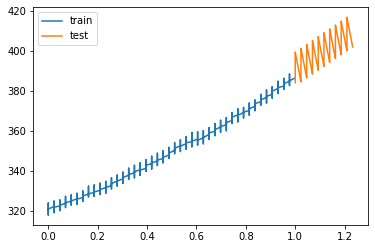

In [107]:
import matplotlib.pyplot as plt
plt.plot(x_train['year'],y_train,label='train')
plt.plot(x_test['year'],y_predicted,label='test')
plt.legend()

# Data

Root Mean Squared Error: 6.763


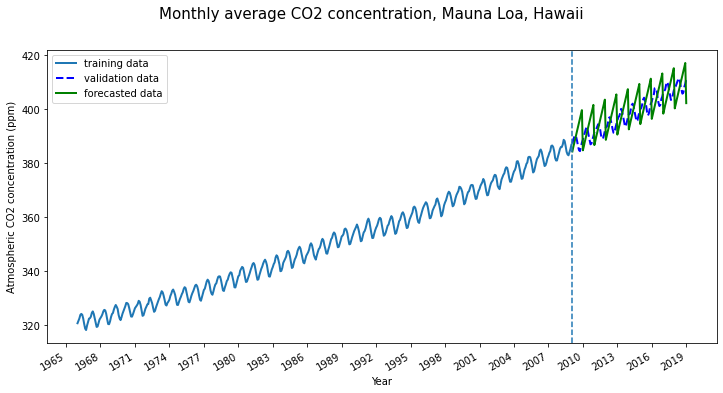

In [109]:
plot_forecast(forecast=y_predicted[:,0])

## Parameters

In [82]:
model= keras.Sequential([
    keras.layer.LSTM(5,input_shape=(512,2))])


model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError()
              )


Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 6672.7769
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 5216.7612
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 3982.5027
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 2970.6594
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 2169.6179
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 1576.9362
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 1154.1593
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 866.8752
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 699.6686
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 605.8598
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 557.8079
Epoch 12/200
5/5 [==============================] - 0s 7ms/step - loss: 539.6007
Epoch 13/200
5/5 [============

5/5 [==============================] - 0s 4ms/step - loss: 534.5375
Epoch 103/200
5/5 [==============================] - 0s 2ms/step - loss: 534.7394
Epoch 104/200
5/5 [==============================] - 0s 3ms/step - loss: 534.6032
Epoch 105/200
5/5 [==============================] - 0s 2ms/step - loss: 534.5345
Epoch 106/200
5/5 [==============================] - 0s 3ms/step - loss: 534.4645
Epoch 107/200
5/5 [==============================] - 0s 3ms/step - loss: 534.4280
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: 534.5522
Epoch 109/200
5/5 [==============================] - 0s 3ms/step - loss: 534.4764
Epoch 110/200
5/5 [==============================] - 0s 3ms/step - loss: 534.3626
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 534.3676
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 534.4016
Epoch 113/200
5/5 [==============================] - 0s 3ms/step - loss: 534.3561
Epoch 114/200
5/5 [===========

In [10]:
WINDOW_SIZE = 2 * NUMBER_FORECAST_STEPS
BATCH_SIZE = 128
counted_data =  tf.constant(list(zip(range(len(co2_by_month_training_data)))))

2022-09-05 18:29:46.107760: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-05 18:29:46.107803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sara-X555LJ): /proc/driver/nvidia/version does not exist
2022-09-05 18:29:46.151329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Autoregressive dataset

In [ ]:
def AutoregressiveDs(windows_size=WINDOW_SIZE, batch_size=BATCH_SIZE):
    """Dataset generator from 'counted_data' base on window_size for single label"""
    return keras.utils.timeseries_dataset_from_array(data=int_sequence[:-3],
targets=int_sequence[3:],
The target for the sequence that
sequence_length=3,
starts at data[N] will be data[N + 3].
batch_size=2,
The sequences will
)
        # Define keywords
    

### Single-shot dataset

In [ ]:
def SingleShotDs(windows_size=WINDOW_SIZE, batch_size=BATCH_SIZE, target_size=NUMBER_FORECAST_STEPS):
    """Generate dataframe for 'target_size' label in each sample"""
    single_shot_ds_input = keras.utils.timeseries_dataset_from_array(
        # Define keywords
    )
    
    single_shot_ds_targets = keras.utils.timeseries_dataset_from_array(
        # Define keywords
    )
    
    return tf.data.Dataset.zip

In [ ]:
single_ds = AutoregressiveDs(windows_size=1)
autoregressive_ds = AutoregressiveDs()
single_shot_ds = SingleShotDs()

In [ ]:
tst = list(single_shot_ds.take(1))
print('single_shot_ds', [i.shape for i in tst[0]])
tst = list(autoregressive_ds.take(1))
print('autoregressive_ds', [i.shape for i in tst[0]])
tst = list(single_ds.take(1))
print('single_ds', [i.shape for i in tst[0]])

# Baseline

In [ ]:
class Baseline(tf.keras.Model):
    def __init__(self, target_size):
        super().__init__()
        self.target_size = target_size

    def call(self, inputs):
        """ repeat last value of input for 'target_size' time as result"""
        return result


In [ ]:
tst = Baseline(target_size=NUMBER_FORECAST_STEPS)
res_final = tst(co2_by_month_training_data)
plot_forecast(res_final)

# Linear model

## Scikit

In [ ]:
inx = int(counted_data[-1, 0].numpy()) + 1
test_range = tf.constant(range(inx, inx + NUMBER_FORECAST_STEPS))[:, tf.newaxis, tf.newaxis]
train_range = tf.constant(range(0, inx))[:, tf.newaxis, tf.newaxis]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_range[...,0], co2_by_month_training_data)
pred = model.predict(test_range[...,0])
plot_forecast(pred)

## Keras

In [ ]:
simple_linear_model = keras.Sequential([
    # define linear model
])
simple_linear_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.99),
                            loss=keras.losses.MeanSquaredError(),
                            metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
his = simple_linear_model.fit(single_ds, epochs=100, verbose=1)

In [ ]:
res_final = simple_linear_model(test_range)
plot_forecast(tf.squeeze(res_final))

# MLP

In [ ]:
mlp = keras.Sequential([
    # define multilayer perceptron model
])
mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.99),
                            loss=keras.losses.MeanSquaredError(),
                            metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
his = mlp.fit(autoregressive_ds, epochs=500, verbose=1)

In [ ]:
start_point_test = counted_data[tf.newaxis,-WINDOW_SIZE:,:]

# LSTM

https://www.tensorflow.org/tutorials/structured_data/time_series